## Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
base_path = '/content/drive/MyDrive/AI Project 2024-2025/'
train_path = os.path.join(base_path, 'Train')
excel_file = os.path.join(base_path, 'dataset_lung.xlsx')


## Importing Libraries

In [3]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 7.1 MB/s eta 0:00:00


In [4]:
!pip install pynrrd

In [5]:
import os
import pandas as pd
import SimpleITK as sitk
import numpy as np
import nrrd  # Assicurati che la libreria sia installata
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

## Caricare le immagini e le etichette

In [6]:
# Funzione per caricare immagini NRRD
def load_nrrd(file_path):
    data, _ = nrrd.read(file_path)
    return data

# Carica il file Excel
dataset_path = '/content/drive/MyDrive/AI Project 2024-2025/dataset_lung.xlsx'  # Cambia con il tuo percorso
df = pd.read_excel(dataset_path)

# Definisci la cartella base delle immagini
base_dir = '/content/drive/MyDrive/AI Project 2024-2025/Train'  # Cambia con il percorso della cartella Train

# Aggiungi percorsi completi al DataFrame
df['Full_slice_path'] = df['Full_slice'].apply(lambda x: os.path.join(base_dir, x))
df['Nodule_path'] = df['Nodule'].apply(lambda x: os.path.join(base_dir, x))


## Creare i dataset

Loading the dataset.

In [7]:
import pandas as pd
import os
import nrrd

# Funzione per caricare immagini NRRD
def load_nrrd(file_path):
    data, _ = nrrd.read(file_path)
    return data

# Carica il file Excel
dataset_path = '/content/drive/MyDrive/AI Project 2024-2025/dataset_lung.xlsx'  # Cambia con il tuo percorso
df = pd.read_excel(dataset_path)

# Definisci la cartella base delle immagini
base_dir = '/content/drive/MyDrive/AI Project 2024-2025/Train'  # Cambia con il percorso della cartella Train

# Aggiungi percorsi completi al DataFrame
df['Full_slice_path'] = df['Full_slice'].apply(lambda x: os.path.join(base_dir, x))
df['Nodule_path'] = df['Nodule'].apply(lambda x: os.path.join(base_dir, x))

# Liste per raccogliere i dati
full_slice_data = []
nodule_data = []

# Loop attraverso le righe del DataFrame
for _, row in df.iterrows():
    # Carica le immagini
    full_slice_image = load_nrrd(row['Full_slice_path'])
    nodule_image = load_nrrd(row['Nodule_path'])

    # Aggiungi i dati alle liste
    full_slice_data.append({'Image': full_slice_image, 'Label': row['TumorClass']})
    nodule_data.append({'Image': nodule_image, 'Label': row['TumorClass']})

# Crea i DataFrame
full_slice_df = pd.DataFrame(full_slice_data)
nodule_df = pd.DataFrame(nodule_data)

# Visualizza il contenuto dei DataFrame
print("Full Slice DataFrame:")
print(full_slice_df.head())

print("\nNodule DataFrame:")
print(nodule_df.head())


Full Slice DataFrame:
                                               Image  Label
0  [[-2048, -2048, -2048, -2048, -2048, -2048, -2...      5
1  [[-3024, -3024, -3024, -3024, -3024, -3024, -3...      5
2  [[-2048, -2048, -2048, -2048, -2048, -2048, -2...      2
3  [[-2048, -2048, -2048, -2048, -2048, -2048, -2...      5
4  [[-2048, -2048, -2048, -2048, -2048, -2048, -2...      4

Nodule DataFrame:
                                               Image  Label
0  [[470, 445, 432, 296, 103, 35, -95, -237, -470...      5
1  [[-923, -913, -886, -878, -828, -711, -626, -6...      5
2  [[493, 521, 422, 53, -500, -818, -878, -879, -...      2
3  [[-855, -848, -877, -884, -868, -875, -847, -8...      5
4  [[81, 71, 74, 61, 63, 60, 61, 71, 53, 35, 19, ...      4


## Salvare i dataset
Salvare i dataset in formato .npy per ricaricarli rapidamente in futuro.

## Caricare i dataset

Quando hai bisogno di accedere ai dataset in un'esecuzione futura, puoi ricaricarli facilmente

## Calcolare statistiche generali

Visualizing some basics statistics could give us some meaningful hints.

In [8]:
def calculate_statistics(df, dataset_name):
    # Estrarre etichette
    labels = df['Label'].value_counts().sort_index()

    # Dimensioni delle immagini
    image_shapes = [image.shape for image in df['Image']]
    heights = [shape[0] for shape in image_shapes]
    widths = [shape[1] for shape in image_shapes]

    # Statistiche delle dimensioni
    height_stats = {
        'mean_height': np.mean(heights),
        'min_height': np.min(heights),
        'max_height': np.max(heights),
    }

    width_stats = {
        'mean_width': np.mean(widths),
        'min_width': np.min(widths),
        'max_width': np.max(widths),
    }

    # Statistiche delle etichette
    label_stats = labels.to_dict()

    print(f"\n=== {dataset_name} Statistics ===")
    print(f"Total Images: {len(df)}")
    print("Label Distribution:")
    for label, count in label_stats.items():
        print(f"  Class {label}: {count} images")
    print("\nImage Dimension Statistics:")
    print(f"  Mean Height: {height_stats['mean_height']:.2f}")
    print(f"  Min Height: {height_stats['min_height']}")
    print(f"  Max Height: {height_stats['max_height']}")
    print(f"  Mean Width: {width_stats['mean_width']:.2f}")
    print(f"  Min Width: {width_stats['min_width']}")
    print(f"  Max Width: {width_stats['max_width']}")

# Calcola statistiche per entrambi i DataFrame
calculate_statistics(full_slice_df, "Full Slice Dataset")
calculate_statistics(nodule_df, "Nodule Dataset")



=== Full Slice Dataset Statistics ===
Total Images: 2363
Label Distribution:
  Class 1: 244 images
  Class 2: 457 images
  Class 3: 1092 images
  Class 4: 418 images
  Class 5: 152 images

Image Dimension Statistics:
  Mean Height: 512.00
  Min Height: 512
  Max Height: 512
  Mean Width: 512.00
  Min Width: 512
  Max Width: 512

=== Nodule Dataset Statistics ===
Total Images: 2363
Label Distribution:
  Class 1: 244 images
  Class 2: 457 images
  Class 3: 1092 images
  Class 4: 418 images
  Class 5: 152 images

Image Dimension Statistics:
  Mean Height: 55.70
  Min Height: 45
  Max Height: 138
  Mean Width: 55.71
  Min Width: 44
  Max Width: 126


In [27]:
# Mostra la forma del dataset full_slice
print(f"Shape of Full Slice Dataset: {full_slice_df.shape}")

Shape of Full Slice Dataset: (2363, 2)


In [28]:
# Mostra la forma del dataset nodule
print(f"Shape of Nodule Dataset: {nodule_df.shape}")

Shape of Nodule Dataset: (2363, 2)


## Visualizzare immagini dai due dataset

Let's visualize and understand how our dataset is.

In [19]:
# Funzione per selezionare 5 immagini per classe
def select_images_for_class(df, target_class, num_images=5):
    # Filtra il DataFrame per la classe target
    class_images = df[df['Label'] == target_class]
    # Seleziona le prime 5 immagini (o meno se non ci sono abbastanza immagini)
    return class_images.head(num_images)

# Funzione per visualizzare le 25 immagini (5 per classe)
def plot_images_for_classes(df, dataset_name, grid_size=(5, 5)):
    selected_images = []

    # Seleziona 5 immagini per ciascuna classe da 1 a 5
    for class_id in range(1, 6):  # Classi da 1 a 5
        selected_images.append(select_images_for_class(df, class_id))

    # Unisci tutte le immagini selezionate in un unico DataFrame
    selected_images_df = pd.concat(selected_images)

    # Crea la figura per visualizzare le immagini
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    axes = axes.flatten()

    # Itera sulle immagini selezionate e le etichette
    for i, (index, row) in enumerate(selected_images_df.iterrows()):
        image = row['Image']

        # Visualizza l'immagine nell'asse corrispondente
        axes[i].imshow(image, cmap='gray')  # Utilizza 'gray' se le immagini sono in scala di grigi
        axes[i].axis('off')  # Rimuove gli assi per una visualizzazione più pulita
        axes[i].set_title(f"Class {row['Label']}", fontsize=10)  # Aggiungi il titolo con la classe

    # Ottimizza la disposizione della griglia
    plt.tight_layout(rect=[0, 0, 1, 0.93])  # Spazio extra per il titolo principale

    # Aggiungi il titolo principale
    plt.suptitle(f"{dataset_name} - 25 Images from 5 Classes", fontsize=16, y=0.98)
    plt.show()



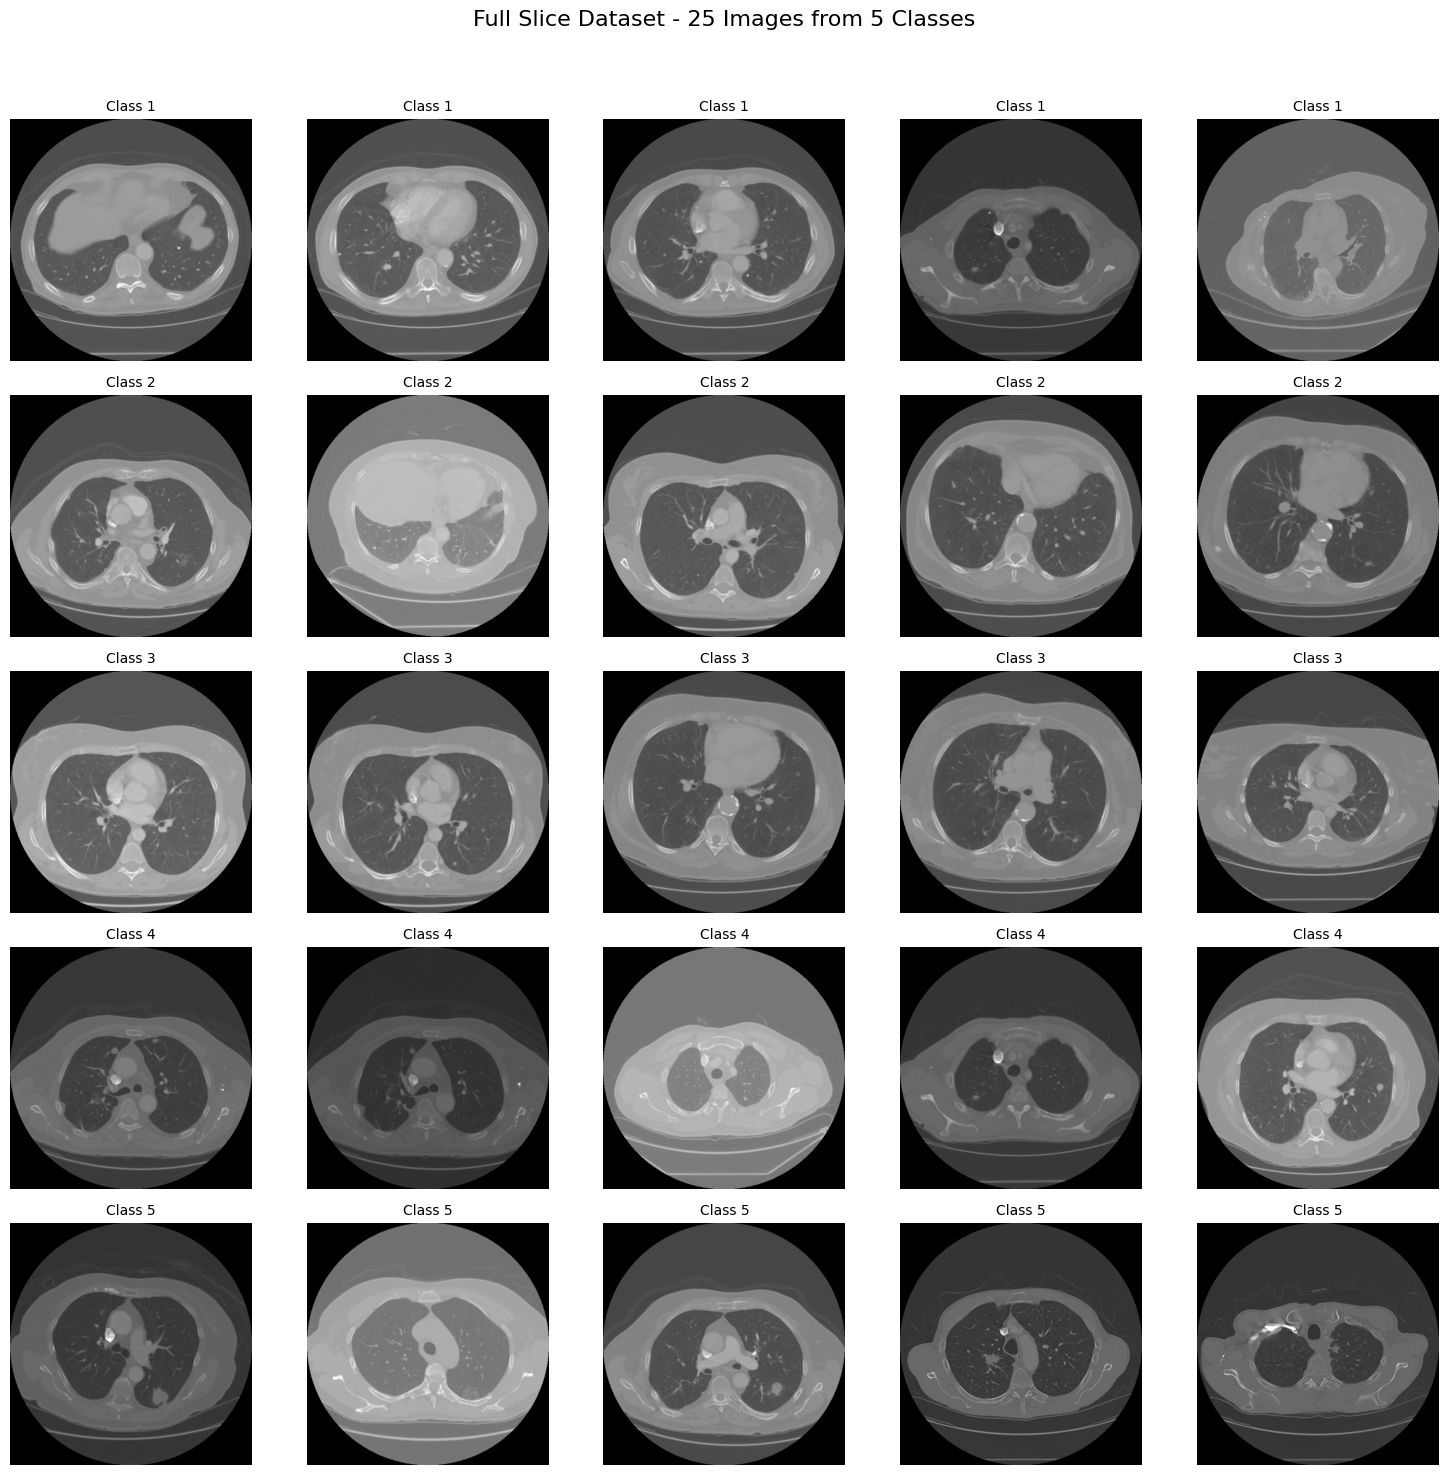

In [20]:
# Visualizza 25 immagini per il dataset "Full Slice"
plot_images_for_classes(full_slice_df, "Full Slice Dataset")

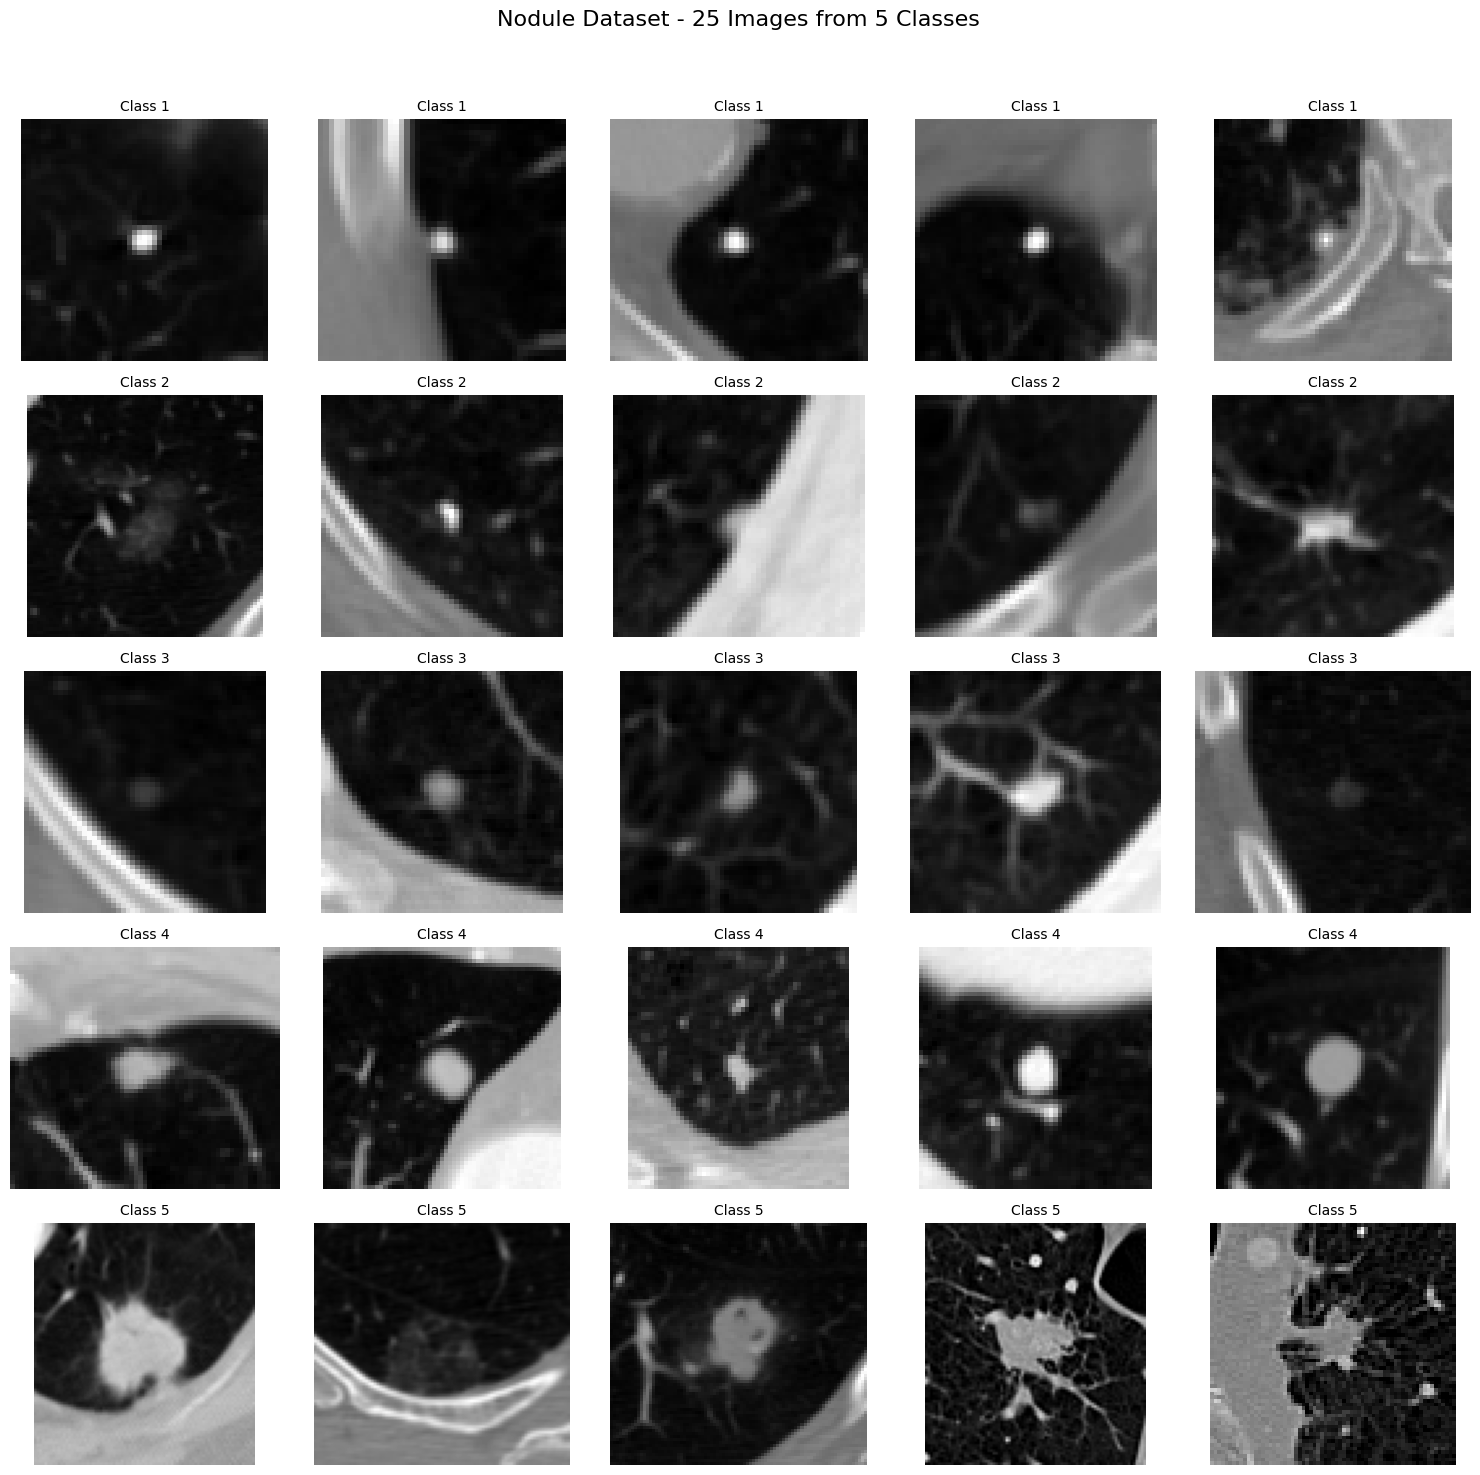

In [21]:
# Visualizza 25 immagini per il dataset "Nodule"
plot_images_for_classes(nodule_df, "Nodule Dataset")

## Plotting Class Distribution

An istogram for each of the dataset allows us to visualize immediately the class distribution of our dataset and the presence of class imbalances.

In [22]:
import matplotlib.pyplot as plt

# Funzione per plottare la distribuzione delle classi
def plot_class_distribution(df, dataset_name):
    # Conta il numero di campioni per ogni classe
    class_counts = df['Label'].value_counts().sort_index()

    # Crea il grafico a barre
    plt.figure(figsize=(8, 6))
    plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

    # Aggiungi etichette e titolo
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Number of Samples', fontsize=14)
    plt.title(f'{dataset_name} - Class Distribution', fontsize=16)
    plt.xticks(class_counts.index)  # Mostra le classi come etichette
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiungi una griglia orizzontale
    plt.tight_layout()

    # Mostra il grafico
    plt.show()

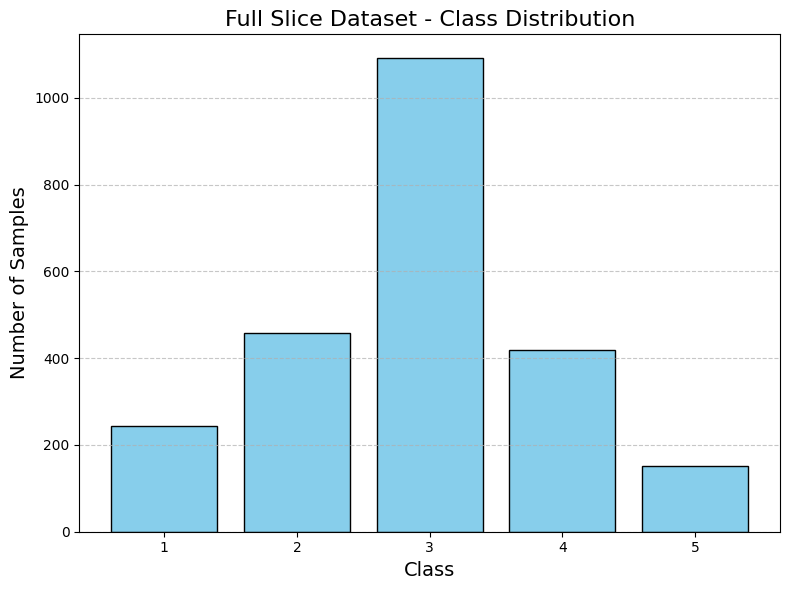

In [23]:
# Plotta la distribuzione delle classi per il dataset "Full Slice"
plot_class_distribution(full_slice_df, "Full Slice Dataset")

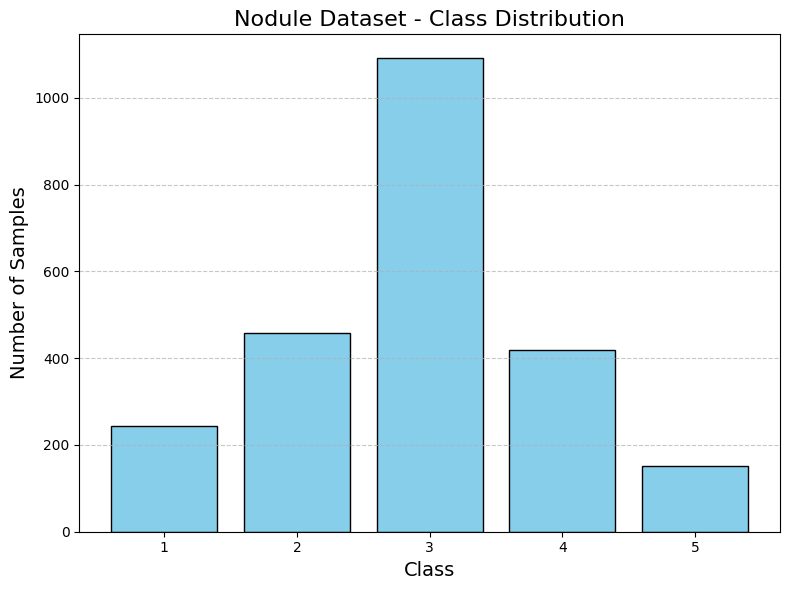

In [24]:
# Plotta la distribuzione delle classi per il dataset "Nodule"
plot_class_distribution(nodule_df, "Nodule Dataset")

Le classi sono tutte sbilanciate, in particolare la classe 3 che contiene nettamente più sample rispetto a tutte le altre. Delle possibili soluzioni per ovviare a questo problema che andrebbe ad intaccare le performance del nostro modello possiamo applicare augmentation come tecnica di oversampling oppure bilanciare le classi assegnando a ciascuna di esse un peso (class weights).

## Duplicates

Checking if there are duplicates in both datasets and in each class.

In [25]:
# Funzione per contare i duplicati
def count_duplicates(df, dataset_name):
    # Conta il numero totale di duplicati
    total_duplicates = df.duplicated(subset='Image').sum()

    # Conta i duplicati per ciascuna classe
    class_duplicates = (
        df[df.duplicated(subset='Image', keep=False)]  # Filtra solo i duplicati
        .groupby('Label')                              # Raggruppa per classe
        .size()                                        # Conta i duplicati per classe
    )

    # Stampa i risultati
    print(f"=== {dataset_name} - Duplicate Analysis ===")
    print(f"Total Duplicates: {total_duplicates}")
    print("Duplicates per Class:")
    for label, count in class_duplicates.items():
        print(f"  Class {label}: {count} duplicates")

# Analizza i duplicati per il dataset "Full Slice"
count_duplicates(full_slice_df, "Full Slice Dataset")

# Analizza i duplicati per il dataset "Nodule"
count_duplicates(nodule_df, "Nodule Dataset")


=== Full Slice Dataset - Duplicate Analysis ===
Total Duplicates: 0
Duplicates per Class:
=== Nodule Dataset - Duplicate Analysis ===
Total Duplicates: 0
Duplicates per Class:


Il Dataset è privo di duplicati.

## Splitting

Splitting the dataset into training, validation and test sets.